<a href="https://colab.research.google.com/github/dpetrovic89/AB-Testing/blob/main/A_B_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', None)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Cake.com/dataset.csv"
data  = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
data .head()


,event_date,event_timestamp,event_name,user_pseudo_id,user_properties,category,country,app_info,traffic_source
0,20230311,1678516231009297,experiment_impression,7.598833e+08,"{\n ""user_properties"": [{\n ""key"": ""belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ"",\n ""value"": {\n ""string_value"": ""qjQilm6yRWSgivobFJEOfQ.0"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": null\n }\n }, {\n ""key"": ""gclid"",\n ""value"": {\n ""string_value"": ""Cj0KCQiAx6ugBhCcARIsAGNmMbhuh6xRXXFd"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": ""1678516121959736""\n }\n }]\n}",mobile,Australia,"{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct)"",\n ""medium"": ""(none)"",\n ""source"": ""(direct)""\n }\n}"
1,20230311,1678516231009297,experiment_impression,7.598833e+08,"{\n ""user_properties"": [{\n ""key"": ""belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ"",\n ""value"": {\n ""string_value"": ""qjQilm6yRWSgivobFJEOfQ.0"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": null\n }\n }, {\n ""key"": ""gclid"",\n ""value"": {\n ""string_value"": ""Cj0KCQiAx6ugBhCcARIsAGNmMbhuh6xRXXFd"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": ""1678516121959736""\n }\n }]\n}",mobile,Australia,"{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct)"",\n ""medium"": ""(none)"",\n ""source"": ""(direct)""\n }\n}"
2,20230311,1678516231009297,experiment_impression,7.598833e+08,"{\n ""user_properties"": [{\n ""key"": ""belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ"",\n ""value"": {\n ""string_value"": ""qjQilm6yRWSgivobFJEOfQ.0"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": null\n }\n }, {\n ""key"": ""gclid"",\n ""value"": {\n ""string_value"": ""Cj0KCQiAx6ugBhCcARIsAGNmMbhuh6xRXXFd"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": ""1678516121959736""\n }\n }]\n}",mobile,Australia,"{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct)"",\n ""medium"": ""(none)"",\n ""source"": ""(direct)""\n }\n}"
3,20230311,1678516231009297,experiment_impression,7.598833e+08,"{\n ""user_properties"": [{\n ""key"": ""belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ"",\n ""value"": {\n ""string_value"": ""qjQilm6yRWSgivobFJEOfQ.0"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": null\n }\n }, {\n ""key"": ""gclid"",\n ""value"": {\n ""string_value"": ""Cj0KCQiAx6ugBhCcARIsAGNmMbhuh6xRXXFd"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": ""1678516121959736""\n }\n }]\n}",mobile,Australia,"{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct)"",\n ""medium"": ""(none)"",\n ""source"": ""(direct)""\n }\n}"
4,20230311,1678516231009297,experiment_impression,7.598833e+08,"{\n ""user_properties"": [{\n ""key"": ""belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ"",\n ""value"": {\n ""string_value"": ""qjQilm6yRWSgivobFJEOfQ.0"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": null\n }\n }, {\n ""key"": ""gclid"",\n ""value"": {\n ""string_value"": ""Cj0KCQiAx6ugBhCcARIsAGNmMbhuh6xRXXFd"",\n ""int_value"": null,\n ""float_value"": null,\n ""double_value"": null,\n ""set_timestamp_micros"": ""1678516121959736""\n }\n }]\n}",mobile,Australia,"{\n ""app_info"": null\n}","{\n ""traffic_source"": {\n ""name"": ""(direct)"",\n ""medium"": ""(none)"",\n ""source"": ""(direct)""\n }\n}"


In [ ]:
# Checking the unique values in the "event_name" column
unique_event_names = data['event_name'].unique()

unique_event_names

array(['experiment_impression', 'user_engagement', 'page_view', 'click',
       'scroll', 'login', 'load', 'sign_up_p', 'sign_up', 'change',
       'switch', 'submit', 'view_item_list', 'add_shipping_info',
       'add_payment_info', 'begin_checkout', 'purchase', 'select'],
      dtype=object)

In [ ]:
# Basic summary of the dataset
rows, columns = data.shape
data_types = data.dtypes
summary = data.describe(include='all')

rows, columns, data_types, summary.head()

(8313,
 9,
 event_date           int64
 event_timestamp      int64
 event_name          object
 user_pseudo_id     float64
 user_properties     object
 category            object
 country             object
 app_info            object
 traffic_source      object
 dtype: object,
           event_date  event_timestamp event_name  user_pseudo_id  \
 count   8.313000e+03     8.313000e+03       8313    8.313000e+03   
 unique           NaN              NaN         18             NaN   
 top              NaN              NaN  page_view             NaN   
 freq             NaN              NaN       3754             NaN   
 mean    2.023031e+07     1.678557e+15        NaN    1.212782e+09   
 
                                                                                                                                                                                                                                                                                                                 

In [ ]:
# Importing necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns


Categorical Columns Analysis: Analyze the frequency and distribution of categorical columns, such as event_name, category, and country.


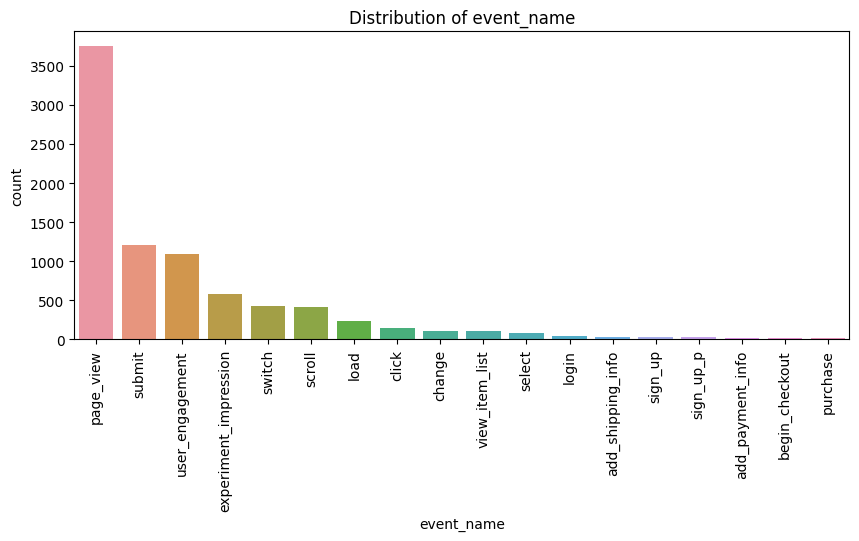

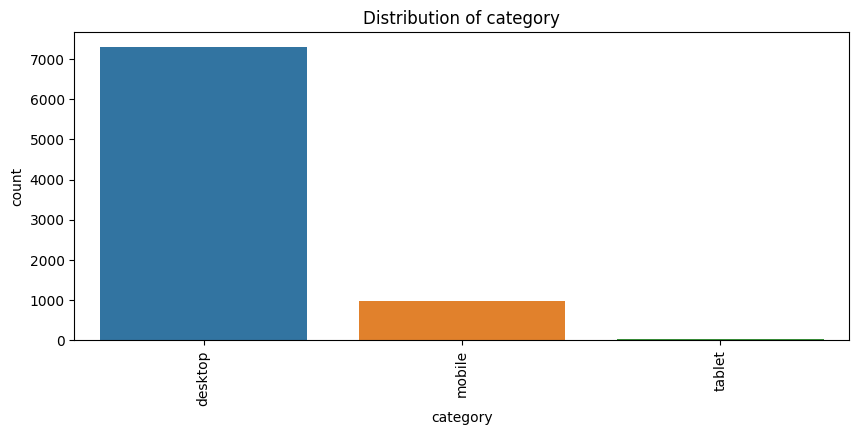

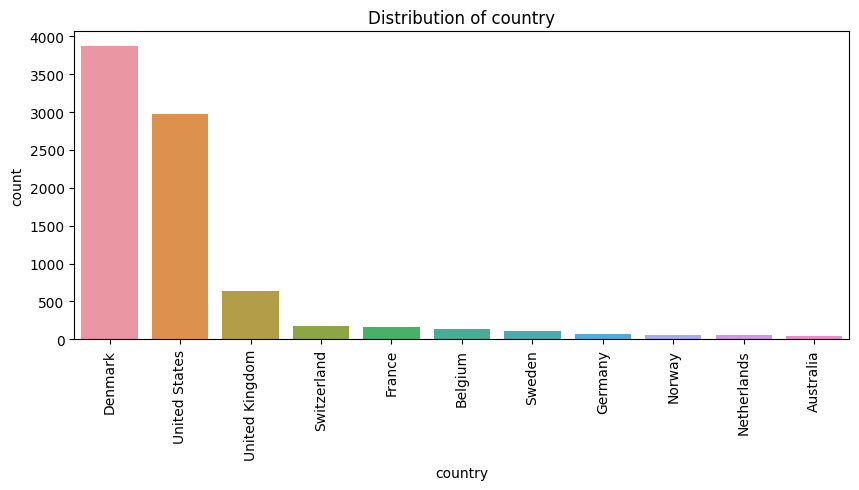

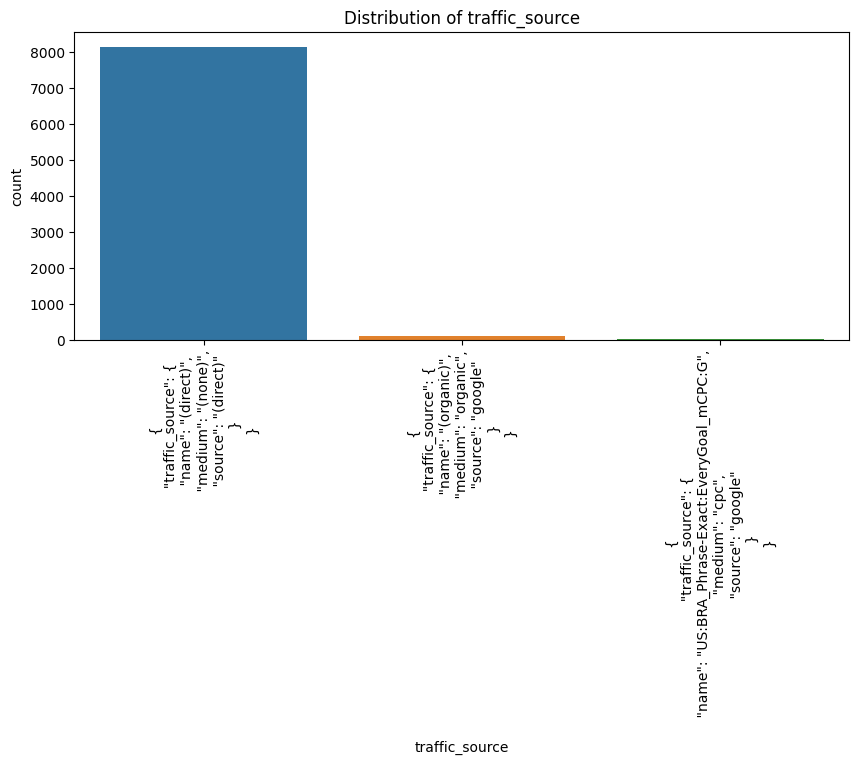

In [ ]:
# Analyzing categorical columns
categorical_columns = ['event_name', 'category', 'country', 'traffic_source']

# Plotting bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=col, order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()


event_name:  "page_view" being the most frequent.

"Denmark" is the most frequent country in the dataset.

majority of events are categorized under "desktop."

Most of the traffic seems to come from (direct).

## Segment the data into control and alternative groups based on the user_properties column.

Create Group Labels: Based on the extracted values, create a new column to label the control and alternative groups.


In [ ]:
# Importing json library to parse user_properties
import json


In [ ]:
# New function to extract the experiment group based on the specified key
def extract_experiment_group_new(user_properties):
    try:
        properties = json.loads(user_properties)['user_properties']
        key_name = 'belongs_to_optimize_experiment_id:qjQilm6yRWSgivobFJEOfQ'
        for item in properties:
            if item['key'] == key_name:
                return item['value']['string_value']
        return None
    except:
        return None




In [ ]:
# Applying the new function to create a new column with the experiment group labels
data['experiment_group_new'] = data['user_properties'].apply(extract_experiment_group_new)

# Segmenting the data into control and alternative groups using the new function
control_group_new = data[data['experiment_group_new'] == 'qjQilm6yRWSgivobFJEOfQ.0']
alternative_group_new = data[data['experiment_group_new'] == 'qjQilm6yRWSgivobFJEOfQ.1']

# Summary of segmented data using the new function
len(control_group_new), len(alternative_group_new)


(1165, 7148)

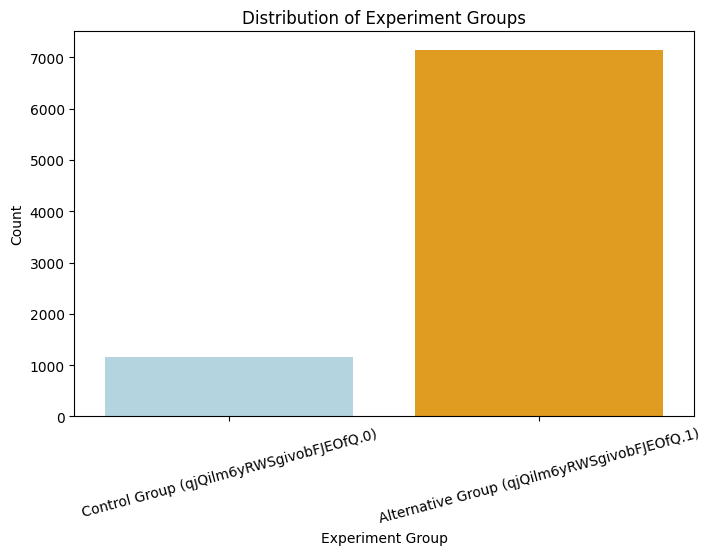

In [ ]:
# Plotting a bar plot for the 'experiment_group_new' column with specified colors
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='experiment_group_new', palette=['lightblue', 'orange'])
plt.title('Distribution of Experiment Groups')
plt.xlabel('Experiment Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Control Group (qjQilm6yRWSgivobFJEOfQ.0)', 'Alternative Group (qjQilm6yRWSgivobFJEOfQ.1)'], rotation=15)
plt.show()



Control Group : Consists of 1,165 observations, representing the baseline or existing setup.

Alternative Group : Consists of 7,148 observations, representing the new variant being tested.


In [ ]:
# Function to categorize traffic source based on the provided criteria
def categorize_traffic_source(traffic_source_json):
    try:
        traffic_source_data = json.loads(traffic_source_json)['traffic_source']
        if traffic_source_data['name'] == '(direct)' or traffic_source_data['source'] == '(direct)':
            return 'direct'
        elif traffic_source_data['medium'] == 'organic':
            return 'organic'
        elif traffic_source_data['medium'] == 'cpc':
            return 'CPC'
        else:
            return 'other'
    except:
        return 'other'

# Applying the function to create a new column with the categorized traffic source
data['categorized_traffic_source'] = data['traffic_source'].apply(categorize_traffic_source)

# Checking the distribution of the new categorized_traffic_source column
categorized_traffic_source_distribution = data['categorized_traffic_source'].value_counts()
categorized_traffic_source_distribution


direct     8147
organic     126
CPC          40
Name: categorized_traffic_source, dtype: int64

Direct: 8,147 observations

Organic: 126 observations

CPC (Cost Per Click): 40 observations

categorization helps in understanding the different channels through which users are accessing the platform, providing insights that can be useful for further analysis or optimization.



In [ ]:
import numpy as np

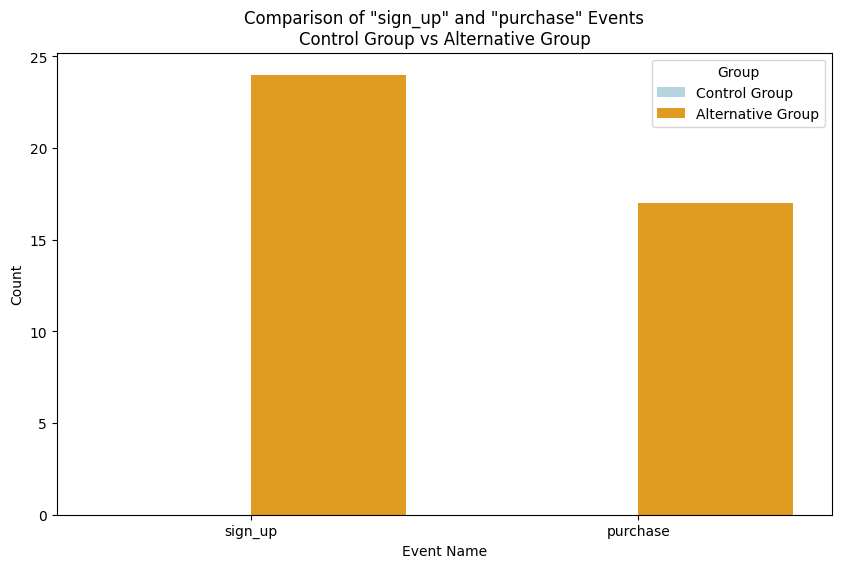

In [ ]:
# Filtering the data for "sign_up" and "purchase" events in the control and alternative groups
control_group_events = control_group_new[control_group_new['event_name'].isin(['sign_up', 'purchase'])]
alternative_group_events = alternative_group_new[alternative_group_new['event_name'].isin(['sign_up', 'purchase'])]

# Combining the filtered control and alternative groups and adding a new column for group labels
visualization_data_filtered = pd.concat([control_group_events, alternative_group_events])
visualization_data_filtered['group_label'] = np.where(visualization_data_filtered['experiment_group_new'] == 'qjQilm6yRWSgivobFJEOfQ.0', 'Control Group', 'Alternative Group')

# Creating a DataFrame with all possible combinations of groups and event names to include missing groups
all_combinations_filtered = pd.DataFrame({
    'event_name': ['sign_up', 'purchase'] * 2,
    'group_label': ['Control Group'] * 2 + ['Alternative Group'] * 2
})

# Calculating the counts for each combination
counts_filtered = visualization_data_filtered.groupby(['event_name', 'group_label']).size().reset_index(name='count')

# Merging with all possible combinations
final_counts_filtered = pd.merge(all_combinations_filtered, counts_filtered, how='left', on=['event_name', 'group_label']).fillna(0)

# Plotting the bar plot with all groups
plt.figure(figsize=(10, 6))
sns.barplot(data=final_counts_filtered, x='event_name', y='count', hue='group_label', palette=['lightblue', 'orange'])
plt.title('Comparison of "sign_up" and "purchase" Events\nControl Group vs Alternative Group')
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.legend(title='Group')
plt.show()


Analysis:


"sign_up" Events: The control group has no occurrences of the "sign_up" event, while the alternative group shows some counts. This indicates that the alternative setup have led to an increase in sign-up events.

"purchase" Events: Similarly, the control group has no occurrences of the "purchase" event, while the alternative group does.


Analysis suggests that the alternative group performed better in terms of the desired events (sign_up and purchase).

# visualize the distribution of events for the control and alternative groups:



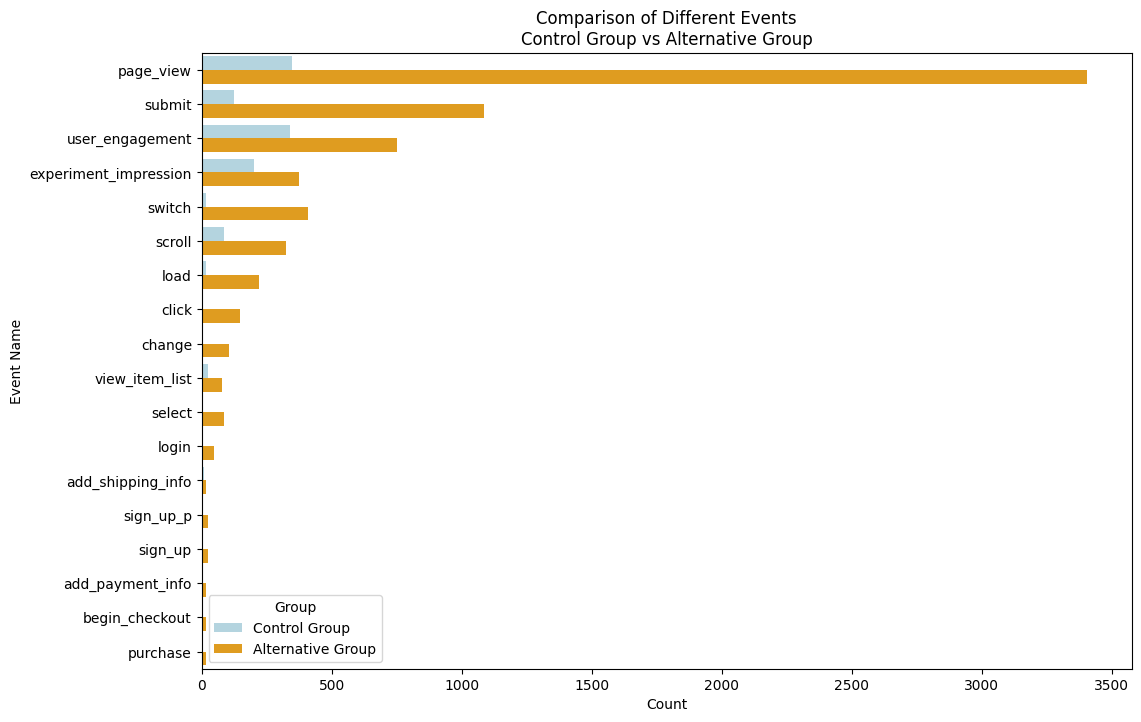

In [ ]:
# Concatenating the control and alternative groups and adding a new column for group labels
visualization_data_all_events = pd.concat([control_group_new, alternative_group_new])
visualization_data_all_events['group_label'] = np.where(visualization_data_all_events['experiment_group_new'] == 'qjQilm6yRWSgivobFJEOfQ.0', 'Control Group', 'Alternative Group')

# Plotting a bar plot to compare the counts of different events between control and alternative groups
plt.figure(figsize=(12, 8))
sns.countplot(data=visualization_data_all_events, y='event_name', hue='group_label', palette=['lightblue', 'orange'], order=visualization_data_all_events['event_name'].value_counts().index)
plt.title('Comparison of Different Events\nControl Group vs Alternative Group')
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.legend(title='Group')
plt.show()


<ipython-input-35-7a62ed484fd6>:3: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  percentage_data['percentage'] = percentage_data.groupby('group_label')['count'].apply(lambda x: x / x.sum() * 100)


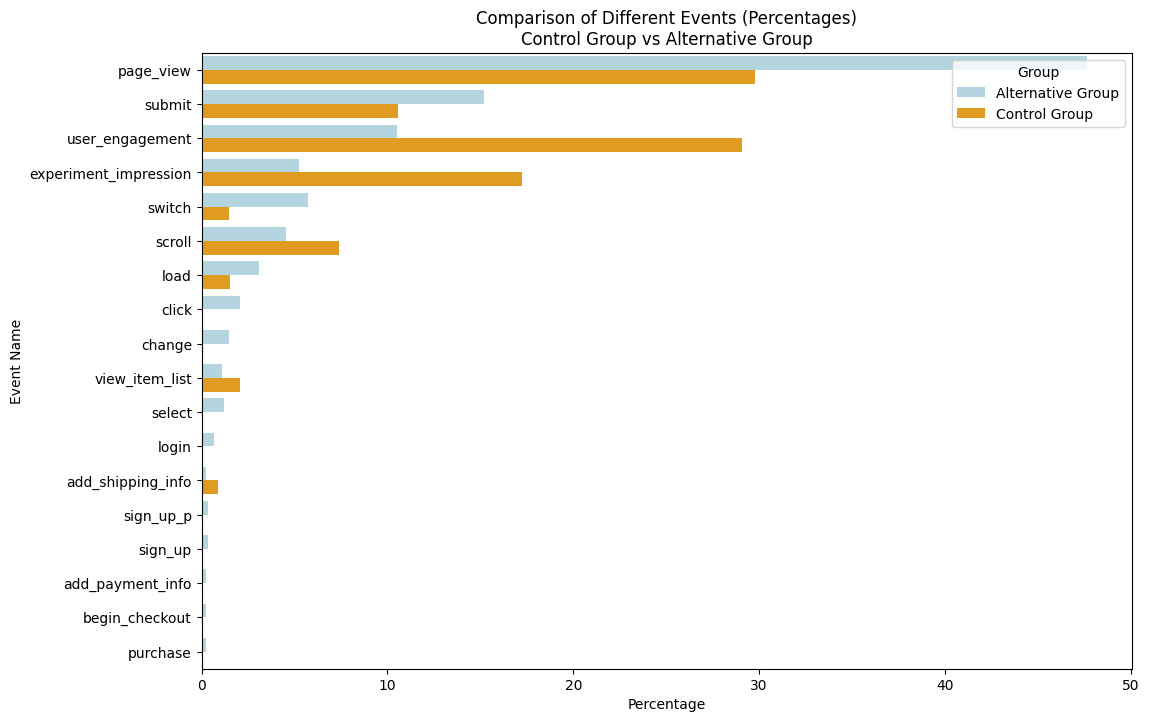

In [ ]:
# Calculating the percentages for each event within the control and alternative groups
percentage_data = visualization_data_all_events.groupby(['event_name', 'group_label']).size().reset_index(name='count')
percentage_data['percentage'] = percentage_data.groupby('group_label')['count'].apply(lambda x: x / x.sum() * 100)

# Plotting a bar plot to compare the percentages of different events between control and alternative groups
plt.figure(figsize=(12, 8))
sns.barplot(data=percentage_data, y='event_name', x='percentage', hue='group_label', palette=['lightblue', 'orange'], order=visualization_data_all_events['event_name'].value_counts().index)
plt.title('Comparison of Different Events (Percentages)\nControl Group vs Alternative Group')
plt.xlabel('Percentage')
plt.ylabel('Event Name')
plt.legend(title='Group')
plt.show()


# table with the percentages

Event Name: Describes the specific event.

Control Group (%): The percentage of occurrences of each event within the control group.

Alternative Group (%): The percentage of occurrences of each event within the alternative group.


In [ ]:
# Pivoting the percentage data to create a table with percentages for each event within the control and alternative groups
percentage_table = percentage_data.pivot(index='event_name', columns='group_label', values='percentage').fillna(0)

# Renaming the columns for better readability
percentage_table.columns.name = None
percentage_table.reset_index(inplace=True)
percentage_table.rename(columns={'Control Group': 'Control Group (%)', 'Alternative Group': 'Alternative Group (%)'}, inplace=True)

# Displaying the percentage table
percentage_table


,event_name,Alternative Group (%),Control Group (%)
0,add_payment_info,0.237829,0.000000
1,add_shipping_info,0.237829,0.858369
2,begin_checkout,0.237829,0.000000
3,change,1.454952,0.000000
4,click,2.056519,0.000000
5,experiment_impression,5.232233,17.253219
6,load,3.091774,1.545064
7,login,0.643537,0.000000
8,page_view,47.663682,29.785408
9,purchase,0.237829,0.000000


#Detailed Analysis:


##Page View Event:

Control Group: 29.79%
Alternative Group: 47.66%
Analysis: The alternative group has a higher percentage of page views, indicating increased user engagement.

##Experiment Impression Event:

Control Group: 17.25%
Alternative Group: 5.23%
Analysis: The control group has a higher percentage of experiment impressions, which might be related to the experimental setup.

##User Engagement Event:

Control Group: 29.10%
Alternative Group: 10.49%
Analysis: Despite having fewer page views, the control group has a higher percentage of user engagement events, suggesting different user behaviors.

##Sign-Up and Purchase Events (Goal of Experiment):

Control Group: 0% for both "sign_up" and "purchase."
Alternative Group: "sign_up" is 0.34% and "purchase" is 0.24%.
Analysis: The alternative group shows occurrences of both "sign_up" and "purchase" events, aligning with the goal of the experiment. The control group shows no occurrences of these events.

##Other Events:

Submit, Scroll, Switch, etc.: Varied percentages across both groups.
Analysis: Other events show different distributions between the control and alternative groups, reflecting various user interactions and behaviors.
Overall Interpretation:
The Alternative Group appears to align with the goals of the experiment, showing occurrences of both "sign_up" and "purchase" events. The increase in page views also suggests higher user interest or engagement.
The Control Group shows no occurrences of the goal events ("sign_up" and "purchase") but has higher percentages in other areas like experiment impressions and user engagement.
